# Data Sciencist Example
1. Extract-Transform-Load (ETL)
2. Exploratory Data Analysis (EDA)
- Univariate Analysis
- Multivariate analysis
3. Feature Extraction / Selection
4. Cleaning/Preprocessing
- Fill
- Standardize Data (Non-include)
5. Model (Non-include)

# 1.Extract-Transform-Load (ETL)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Load Files Into a DataFrame

In [5]:
df = pd.read_csv("./data/House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner


## Shape

In [11]:
df.shape

(4746, 12)

## Info About the Data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4746 non-null   int64  
 2   Rent               4746 non-null   int64  
 3   Size               4746 non-null   int64  
 4   Floor              4746 non-null   object 
 5   Area Type          4746 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Furnishing Status  4746 non-null   object 
 9   Tenant Preferred   4746 non-null   object 
 10  Bathroom           4739 non-null   float64
 11  Point of Contact   4746 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 445.1+ KB


## Checking Columns

In [13]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

## Checking Null Value

In [14]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             7
Point of Contact     0
dtype: int64

# 2.Exploratory Data Analysis (EDA)

In [15]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4739.000000
mean,2.083860,3.499345e+04,967.490729,1.967293
std,0.832256,7.810641e+04,634.202328,0.884405
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [16]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [25]:
#converting Furnishing Status
df['Furnishing Status'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [26]:
Unfurnished = df['Furnishing Status'] == 'Unfurnished'
SemiFurnished = df['Furnishing Status'] == 'Semi-Furnished'
Furnished = df['Furnishing Status'] == 'Furnished'

In [29]:
df['Furnishing Status'][Unfurnished] = 0
df['Furnishing Status'][SemiFurnished] = 1
df['Furnishing Status'][Furnished] = 2

C:\Users\Guntsv\AppData\Local\Temp\ipykernel_21224\1161049622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Furnishing Status'][Unfurnished] = 0
C:\Users\Guntsv\AppData\Local\Temp\ipykernel_21224\1161049622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Furnishing Status'][SemiFurnished] = 1
C:\Users\Guntsv\AppData\Local\Temp\ipykernel_21224\1161049622.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Furnishin

In [30]:
df['Furnishing Status'].unique()

array([0, 1, 2], dtype=object)

In [38]:
#Drop some rows, having abnormal number like Rent
df[df['Rent']>1000000]

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1001,2022-06-01,4,1200000,5000,4 out of 15,Carpet Area,Juhu,Mumbai,1,Bachelors/Family,4.0,Contact Agent
1837,2022-06-08,3,3500000,2500,4 out of 4,Carpet Area,Marathahalli,Bangalore,1,Bachelors,3.0,Contact Agent


In [39]:
np.where(df['Rent'] > 1000000)[0]

array([1001, 1837], dtype=int64)

In [40]:
df.iloc[1001]

Posted On                  2022-06-01
BHK                                 4
Rent                          1200000
Size                             5000
Floor                     4 out of 15
Area Type                 Carpet Area
Area Locality                    Juhu
City                           Mumbai
Furnishing Status                   1
Tenant Preferred     Bachelors/Family
Bathroom                          4.0
Point of Contact        Contact Agent
Name: 1001, dtype: object

In [41]:
(np.where(df['Rent']>1000000)[0]).tolist()

[1001, 1837]

In [42]:
df.drop((np.where(df['Rent']>1000000)[0]).tolist(), axis=0, inplace=True)

In [43]:
df.shape

(4744, 12)

#### 2.1 Univariate Analysis
- look at one variable
- main tools - countplot and displot
- countplot for discrete features
- displot for continuous features

<AxesSubplot:xlabel='Furnishing Status', ylabel='count'>

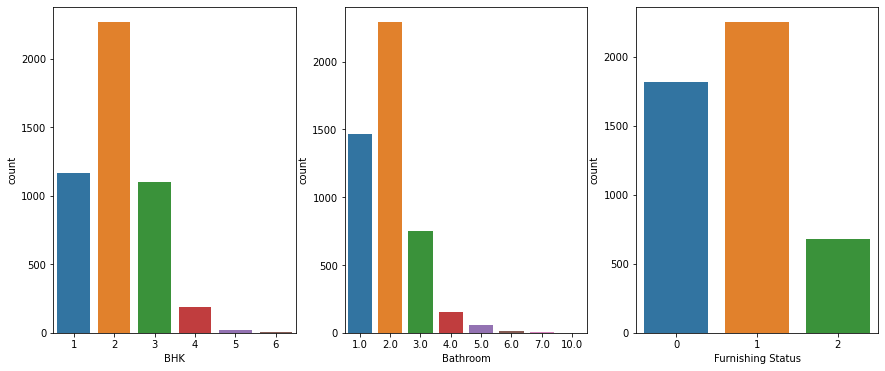

In [45]:
# Countplot or distplot ?
plt.figure(figsize=(20, 6))
plt.subplot(1, 4, 1)
sns.countplot(data=df,x='BHK')
plt.subplot(1, 4, 2)
sns.countplot(data=df,x='Bathroom')
plt.subplot(1, 4, 3)
sns.countplot(data=df,x='Furnishing Status')

c:\Python3.10.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python3.10.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rent', ylabel='Density'>

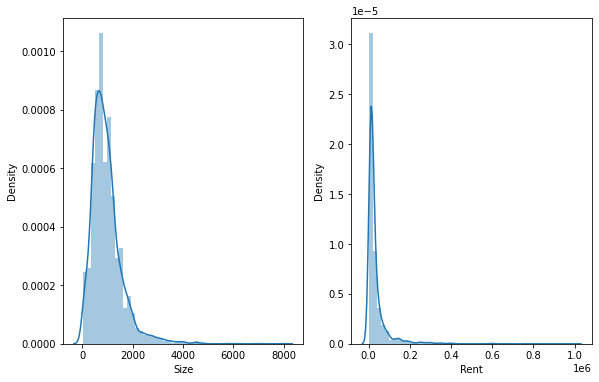

In [48]:
#let's displot 
#in this case Rent, theorentically can have 7500.2
#so Rent is considered Continuous
plt.figure(figsize=(25, 6))
plt.subplot(1, 5, 1)
sns.distplot(df['Size'])
plt.subplot(1, 5, 2)
sns.distplot(df['Rent'])

#### 2.2 Multivariate analysis
- look at two featuress/labels at the same time
- e.g., see how bathroomms affect Rent -> bivaraint analysis
- e.g., see hwo size affect Rent
- usually, y is label and x is any giben feature
- Goal: which factor/features are somwhow related tomy label, i.e., Rent
- boxplot : for discrete vs continuous features
- scatterplot : for continuous vs continuous features

In [49]:
df['Bathroom'].unique()

array([ 2.,  1., nan,  3.,  5.,  4.,  6.,  7., 10.])

<AxesSubplot:xlabel='Bathroom', ylabel='Rent'>

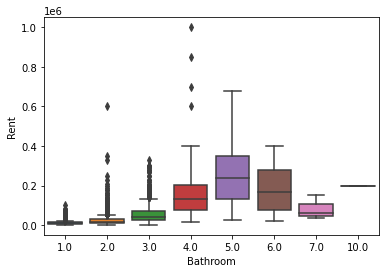

In [50]:
sns.boxplot(x = df['Bathroom'], y= df['Rent'])

In [51]:
df['City'].value_counts()

Mumbai       971
Chennai      891
Bangalore    885
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

<AxesSubplot:xlabel='City', ylabel='Rent'>

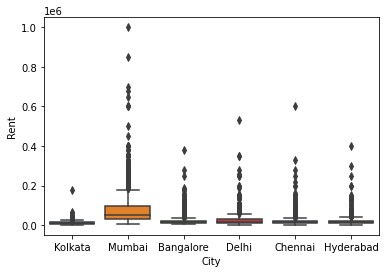

In [52]:
sns.boxplot(x = df['City'], y= df['Rent'])

<AxesSubplot:xlabel='Size', ylabel='Rent'>

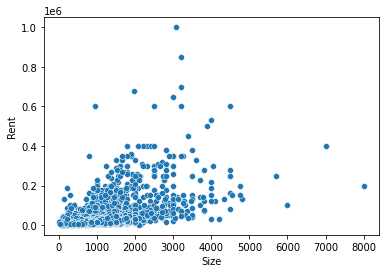

In [53]:
sns.scatterplot(x = df['Size'], y=df['Rent'])

<AxesSubplot:>

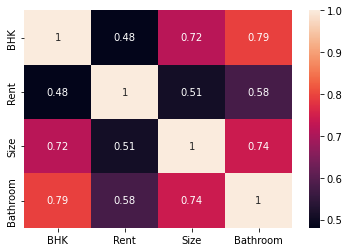

In [54]:
sns.heatmap(df.corr(), annot =True)

In [56]:
firstpivot = df.Size.median() - df.Size.std()
firstpivot

218.76533570443655

In [57]:
secodnpivot = df.Size.median() + df.Size.std()
secodnpivot

1481.2346642955636

In [58]:
#So I want to make three groups
#Group 1: < 218.75
cond1 = df.Size < firstpivot #basically a list of True and False (can be used to select indexes) 

#Group 2: 218.76 to 1481.234
cond2 = (df.Size >= firstpivot) & (df.Size <= secodnpivot)

#Group 3: > 1481.234
cond3 = df.Size > secodnpivot

In [60]:
# df.cat_size = 1 cannot use because u don't have distribution yet
df['cat_size'] = 1

#format : df.loc[masking indexes, column] 
df.loc[cond1, 'cat_size'] = 1
df.loc[cond2, 'cat_size'] = 2
df.loc[cond3, 'cat_size'] = 3

In [61]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,cat_size
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,0,Bachelors/Family,2.0,Contact Owner,2
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,1,Bachelors/Family,1.0,Contact Owner,2
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,1,Bachelors/Family,1.0,Contact Owner,2
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,0,Bachelors/Family,1.0,Contact Owner,2
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,0,Bachelors,1.0,Contact Owner,2


<AxesSubplot:xlabel='cat_size', ylabel='Rent'>

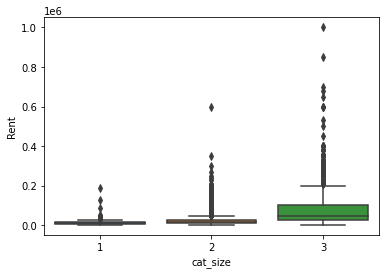

In [62]:
sns.boxplot(x = df['cat_size'], y = df['Rent'])

# 3. Feature Extraction / Selection

In [63]:
X =  df[['Size','Bathroom','BHK']] #if not, you will NOT get a shapre of (m,n)
y = df[['Rent']]